            hCG  Progesterone    Estrogen           WBC  Hemoglobin  \
0      1.872701      4.758500  224.958304   5832.179823   14.478353   
1      0.917023      1.590787  166.931801   4912.623251   13.156569   
2  22806.218860     80.665837  279.706404  10839.232050   13.591350   
3      0.488361      3.452742  143.242698   7479.754163   12.413434   
4      2.733551      1.005787  291.483696   7827.957474   15.322642   

     Platelets       Iron    Calcium  BloodGlucose  PregnancyStatus  \
0  288952.0646  85.157729   9.509561     89.748302                0   
1  224358.4440  74.713710   9.345988     80.876963                0   
2  256110.9583  52.268465   9.199873     99.474398                1   
3  316127.2456  51.687345   9.904432     75.403299                0   
4  224545.7329  46.250587  10.186850     89.618583                0   

   MonthsPregnant  
0               0  
1               0  
2               4  
3               0  
4               0  
<class 'pandas.core.frame.

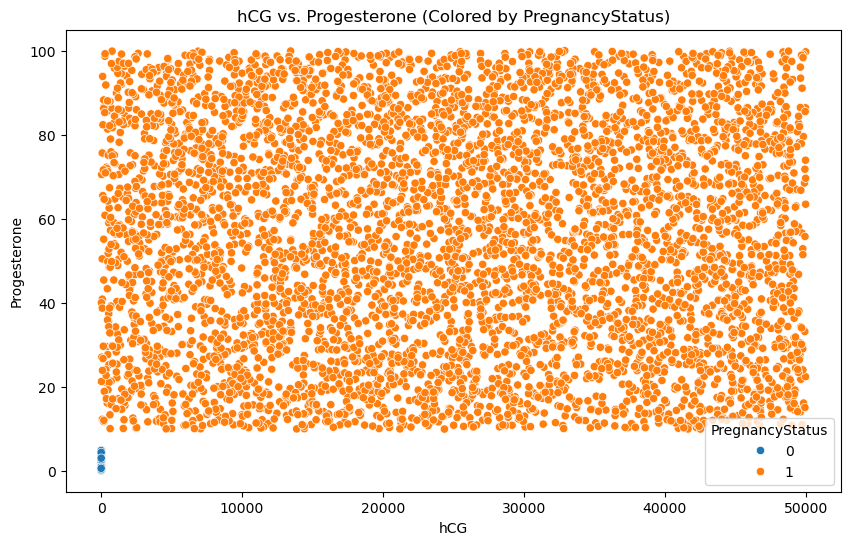

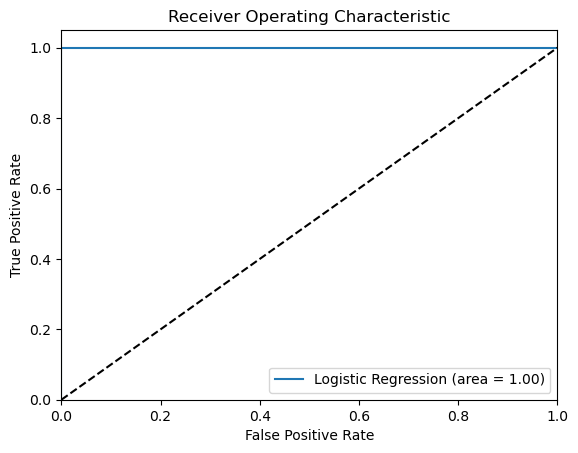

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# Load the data
df = pd.read_csv("new-dummy-data.csv")

# Data inspection
print(df.head())
print(df.info())

# Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any) - Impute with mean for now
df = df.fillna(df.mean())

# Separate features (X) and target variable (y)
X = df.drop(["PregnancyStatus", "MonthsPregnant"], axis=1)
y = df["PregnancyStatus"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression model
model_lr = LogisticRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_lr)}")

# Optional: Feature Importance (Logistic Regression coefficients)
coefficients = pd.DataFrame(model_lr.coef_.T, X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coefficients)

# Optional: Visualization (example: scatter plot of two features vs. PregnancyStatus)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hCG', y='Progesterone', hue='PregnancyStatus', data=df)
plt.title('hCG vs. Progesterone (Colored by PregnancyStatus)')
plt.show()

# Optional: Visualization of ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba_lr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()